**Проект Яндекс.Практикума. Статистический анализ данных**

**Курс: Аналитик данных**

---



**СОДЕРЖАНИЕ**

---
[**Описание проекта**](#description)

[**Импорт библиотек и загрузка данных**](#loading)

[**Предобработка данных**](#preparing)

[**Исследовательский анализ данных (EDA)**](#EDA)

[**Формулировка и проверка статистических гипотез**](#hypotheses)

[**Выводы и рекомендации**](#summary)

---




## **Описание проекта**<a  class="anchor" id="description"></a>

##  **Импорт библиотек и загрузка данных**<a  class="anchor" id="loading"></a>



**Импорт библиотек**

---



In [1]:
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
from scipy import stats as st

from datetime import datetime, timezone
import calendar

import warnings
warnings.filterwarnings("ignore")

**Загрузка данных**

---



In [2]:
# Функция формирования ссылки для загрузки файлов с гугл-диска
def gdisk_gownload(link):
    return 'https://drive.google.com/uc?id=' + link.split('/')[-2]

In [3]:
try:
    calls=pd.DataFrame(pd.read_csv(' ',parse_dates=['call_date']))
    internet=pd.DataFrame(pd.read_csv(' ',parse_dates=['session_date']))
    messages=pd.DataFrame(pd.read_csv( ',parse_dates=['message_date']))
    tariffs=pd.DataFrame(pd.read_csv(' '))
    users=pd.DataFrame(pd.read_csv(' '))
except:
    calls=pd.read_csv(gdisk_download('https://drive.google.com/file/d/ /view?usp=sharing'),parse_dates=['call_date'])
    internet=pd.read_csv(gdisk_download('https://drive.google.com/file/d/ /view?usp=sharing'),parse_dates=['session_date'])
    messages=pd.read_csv(gdisk_download('https://drive.google.com/file/d/ /view?usp=sharing'),parse_dates=['message_date'])
    tariffs=pd.read_csv(gdisk_download('https://drive.google.com/file/d/ /view?usp=sharing'))
    users=pd.read_csv(gdisk_download('https://drive.google.com/file/d/ /view?usp=sharing'))

**Проверка таблиц на полноту и соответствие типов полей описанию**

---



In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Таблица "Информация о звонках" не содержит пропусков. Большинство типов данных полей соотвествуют описанию.

In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Таблица "Информация об интернет сессиях" не содержит пропусков. Большинство типов данных полей соотвествуют ожидаемым значениям. В структуре присутствует поле не указанное в описании данных.

In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Таблица "Информация о сообщениях" не содержит пропусков. Типы данных полей соотвествуют описанию.

In [7]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица "Информация о тарифах" не содержит пропусков. Типы данных полей соотвествуют описанию.

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица "Информация о пользователях" содержит пропуски в поле "Дата прекращения пользования тарифом" обусловленные характером содержащихся данных. Типы данных полей соотвествуют описанию.



---



---




## **Предобработка данных**<a  class="anchor" id="preparing"></a>

#### **Приведение типов данных и исправление структуры таблиц**

---



В поле "Продолжительность звонка в минутах" (таблица "Информация о звонках" ) и "Объем потраченного за сессию интернет-трафика" (таблица "Информация об интернет сессиях") имеют вещественный тип, хотя по условию "Мегалайн" округляет вверх значения минут разговоров и мегабайтов сессий. Округлим значения и приведем тип полей к целочисленному. 

In [9]:
calls['duration']=np.ceil(calls['duration'])
calls['duration']=calls['duration'].astype('int64')

In [10]:
internet['mb_used']=np.ceil(internet['mb_used'])
internet['mb_used']=internet['mb_used'].astype('int64')



---



Визуально в столбце "Unnamed: 0" таблицы "Информация об интернет сессиях" содержится задвоенный индекс строк.

In [11]:
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
89086,89086,1301_82,353,2018-11-25,1301
51901,51901,1176_56,98,2018-07-23,1176
100212,100212,1337_249,380,2018-11-26,1337
90607,90607,1307_224,132,2018-12-22,1307
67640,67640,1228_425,19,2018-11-26,1228
50964,50964,1174_172,220,2018-06-22,1174
107765,107765,1366_120,124,2018-12-24,1366
113419,113419,1384_129,252,2018-06-06,1384
44752,44752,1154_310,795,2018-09-11,1154
36524,36524,1126_471,498,2018-05-27,1126


Проверим количество записей в таблице "Информация об интернет сессиях", для которых значения в столбце  "Unnamed: 0" совпадают с их индексом.

In [12]:
print('Доля совпадений значения столбца с индексом строки: {:.1%}'.\
      format(internet[internet.index==internet['Unnamed: 0']]['Unnamed: 0'].count()/len(internet)))

Доля совпадений значения столбца с индексом строки: 100.0%


Удалим лишний столбец из таблицы.

In [13]:
del internet['Unnamed: 0']



---



Приведем тип столбца "Возраст пользователя (годы)" таблицы "Информация о пользователях" к более соотвествующему короткому целому (Int8).

In [14]:
users['age']=users['age'].astype('int8')



---



#### **Исправление ошибок в данных и добавление новых полей**

**Исследование таблицы "Информация о звонках".**



Проанализируем сводную статистику по звонкам абонентов. 

Дублированных записей в таблице "Информация о звонках" нет.

In [15]:
calls.duplicated().sum()

0

Половина звонков приходится на интервал от 2 до 11 минут. Максимальная длительность звонка зафиксирована в 38 минут, что находится в разумных границах продолжительности разговоров.

In [16]:
calls['duration'].describe().apply(lambda x: format(x, '.1f'))

count    202607.0
mean          7.2
std           6.0
min           0.0
25%           2.0
50%           6.0
75%          11.0
max          38.0
Name: duration, dtype: object

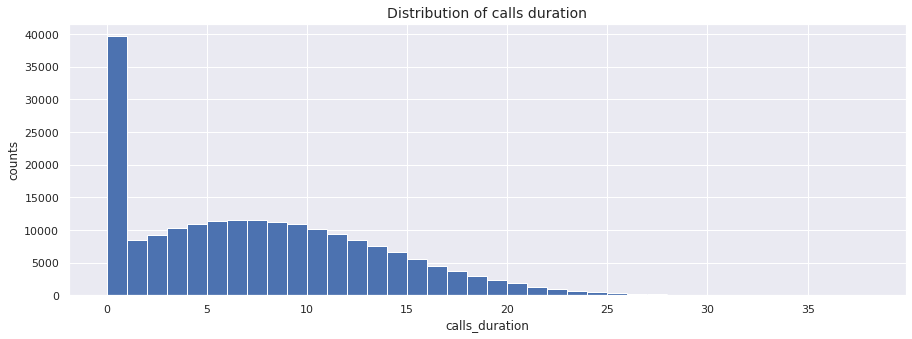

In [17]:
plt.figure(figsize=(15, 5))
plt.hist(calls.duration,bins=int(max(calls.duration)))
plt.title('Distribution of calls duration',fontsize=14)
plt.xlabel('calls_duration')
plt.ylabel('counts')
plt.grid(True)
plt.show();

Минимальная продолжительность звонков зафиксирована на уровне 0 минут. Количество таких записей отностительно велико - около 1/5. 

In [18]:
print('Доля звонков с нулевой длительностью в общем количестве соcтавляет {:.2%}.'.format(calls.query('duration==0').shape[0]/calls.shape[0]))

Доля звонков с нулевой длительностью в общем количестве соcтавляет 19.55%.


Проанализируем, являются ли записи с нулевой продолжительностью звонков ошибкой в данных, характерной для информации от некоторых абонентов, или представляют собой стандартную ситуацию.

In [19]:
user_zero_calls=calls.query('duration==0')
user_zero_calls_total=calls[calls['user_id'].isin(user_zero_calls["user_id"])]

Сформируем сводную таблицу, содержащую данные о количестве пропущенных звонков у абонентов и общем количестве их звонков.

In [20]:
zero_calls_pivot=user_zero_calls.pivot_table(index='user_id',values="duration",aggfunc='count')
zero_calls_total_pivot=user_zero_calls_total.pivot_table(index='user_id',values="duration",aggfunc='count')
zero_calls_pivot=zero_calls_pivot.join(zero_calls_total_pivot, rsuffix='_total')

In [21]:
print('Количество абонентов со звонками нулевой длительности соcтавляет {} ({:.2%} от общего количества).'.format(zero_calls_pivot.shape[0],zero_calls_pivot.shape[0]/users.shape[0]))

Количество абонентов со звонками нулевой длительности соcтавляет 492 (98.40% от общего количества).


Звонки нулевой длительности характерны для данных подавляющего большинства абонентов (98,4%). 

Рассчитаем долю нулевых звонков в общем количестве у абонентов, у которых они обнаружены.

In [22]:
zero_calls_pivot.columns =['zero_calls_count','total_calls_count']
zero_calls_pivot['zero_calls_ratio']=zero_calls_pivot['zero_calls_count']/zero_calls_pivot['total_calls_count']

In [23]:
print('Доля звонков с нулевой длительностью у абонентов в среднем соcтавляет {:.2%} (стандартное отклонение - {:.2%}).'.format(np.mean(zero_calls_pivot['zero_calls_ratio']),np.var(zero_calls_pivot['zero_calls_ratio'])**0.5))

Доля звонков с нулевой длительностью у абонентов в среднем соcтавляет 19.61% (стандартное отклонение - 2.95%).


Сравнительно небольшой разброс (плюс/минус ~ 3%) от высокой средней доли нулевых звонков, позволяет сделать вывод типичности подобной ситуации для абонентов сети.

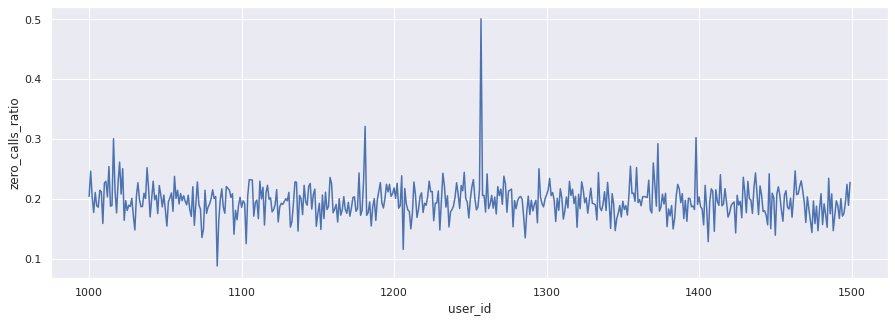

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(zero_calls_pivot['zero_calls_ratio'])
plt.xlabel('user_id')
plt.ylabel('zero_calls_ratio')
plt.show()

Как мы можем предположить, звонки с нулевой общей продолжительностью могут иметь следующую природу: это либо звонок, пропущенный вызываемым абонентом, либо ошибочный набор (не целевому абоненту, неправильно набран номер) или условный, "сигнальный" набор номера ("выходи", "прочитай сообщение", "перезвони" и т.д.).

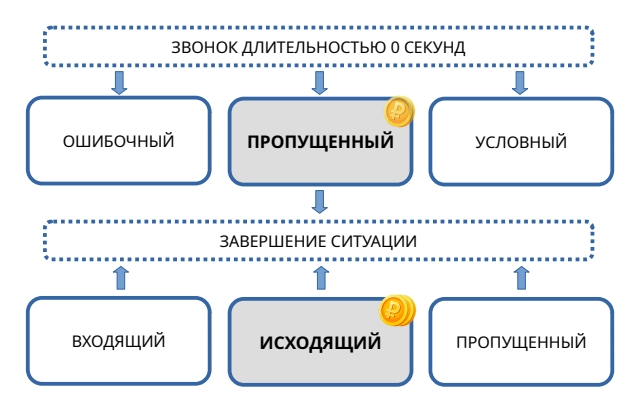

Из вышеуказанных причин появления в данных нулевых звонков для нас могут иметь значение только звонки первого рода, как выражающие намерение абонента осуществить разговор с потенциальной монетизацией для "Мегалайна". Дальнейшим развитием этой ситуации является или поступление входящего от пропустившего звонок абонента, или последующий пропущенный звонок, или, наконец, полноценный исходящий звонок (в случае дозвона).

Однако, исходящие звонки (субституты) в результате дозвона, скорее всего, уже присутствуют в базе данных, а значит информация о звонках нулевой длительности им предществовавших не имеет ценности для целей исследования тарифов. Эти записи могут быть удалены из анализируемых данных без ущерба для качества исследования.

In [25]:
calls_wo_zero = pd.DataFrame(calls.query('duration!=0'))

In [26]:
calls_wo_zero['duration'].describe().apply(lambda x: format(x, '.2f'))

count    162994.00
mean          8.90
std           5.35
min           1.00
25%           5.00
50%           8.00
75%          12.00
max          38.00
Name: duration, dtype: object

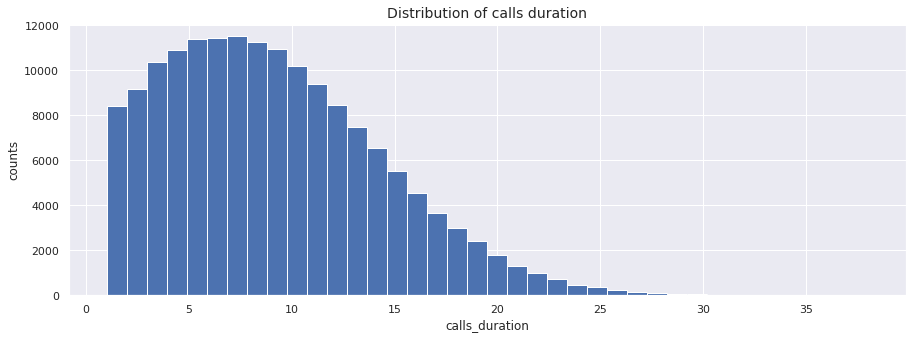

In [27]:
plt.figure(figsize=(15, 5))
plt.hist(calls_wo_zero.duration,bins=int(max(calls_wo_zero['duration'])))
plt.title('Distribution of calls duration',fontsize=14)
plt.xlabel('calls_duration')
plt.ylabel('counts')
plt.grid(True)
plt.show();

По очищенным от нулеых значений данным о продолжительности разговоров получаем распределение со смещением вправо с (по форме - распределение Пуассона) типичным (средним) разговором длительностью около 9 минут (плюс/минус 5 мин 21 сек.).

Добавим в таблицу с очищенными данными о продолжительности разговоров столбец, содержащий информацию о месяце совершения звонка.

In [28]:
calls_wo_zero['month'] = pd.DatetimeIndex(calls_wo_zero['call_date']).month
calls_wo_zero['month'] = calls_wo_zero['month'].apply(lambda x: calendar.month_abbr[x])

Создадим результирующую таблицу с данными об использовании минут звонков, мегабайтов трафика и количестве сообщений пользователей по месяцам.

In [29]:
result_table = calls_wo_zero.pivot_table(index=['user_id','month'],values='duration',aggfunc=['count','sum']).fillna(0)

In [30]:
result_table.head()

count      sum
              duration duration
user_id month                  
1000    Aug         42      408
        Dec         38      333
        Jul         41      340
        Jun         28      172
        May         17      159

**Исследование таблицы "Информация об интернет сессиях".**

---



Проанализируем сводную статистику по интернет-сессиям абонентов. 

Дублированных записей в таблице "Информация об интернет сессиях" нет.

In [31]:
internet.duplicated().sum()

0

In [32]:
internet.mb_used.describe().apply(lambda x: format(x, '.1f'))

count    149396.0
mean        370.6
std         278.4
min           0.0
25%         139.0
50%         349.0
75%         560.0
max        1725.0
Name: mb_used, dtype: object

Половина интернет-сессий имеет объем в интервале от 139 до 560 Мб. Максимальный зафиксированный трафик - 1.68Гб, адекватен для мобильного интернета.

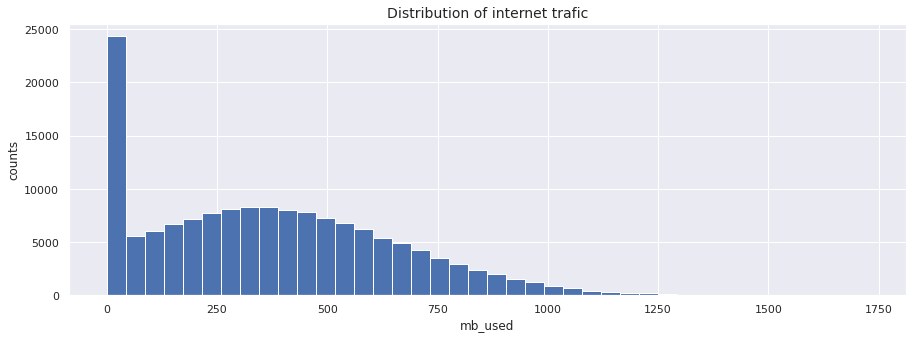

In [33]:
plt.figure(figsize=(15, 5))
plt.hist(internet.mb_used,bins=40)
plt.title('Distribution of internet trafic',fontsize=14)
plt.xlabel('mb_used')
plt.ylabel('counts')
plt.grid(True)
plt.show();

Довольно значительное количество интернет-сессий имеет нулевой объем.

In [34]:
print('Доля интернет-сессий "0Мб" в общем количестве соcтавляет {:.2%}.'.format(internet.query('mb_used==0').shape[0]/internet.shape[0]))

Доля интернет-сессий "0Мб" в общем количестве соcтавляет 13.12%.


Проанализируем, являются ли сессии нулевого объема ошибкой в данных, характерной для информации от некоторых абонентов, или представляют собой стандартную ситуацию.

Сформируем сводную таблицу, содержащую данные о количестве у абонентов интернет-сессий нулевого трафика и общем количестве соединений.

In [35]:
user_zero_inet=internet.query('mb_used==0')
user_zero_inet_total=internet[internet['user_id'].isin(user_zero_inet["user_id"])]

In [36]:
zero_inet_pivot=user_zero_inet.pivot_table(index='user_id',values="mb_used",aggfunc='count')
zero_inet_total_pivot=user_zero_inet_total.pivot_table(index='user_id',values="mb_used",aggfunc='count')
zero_inet_pivot=zero_inet_pivot.join(zero_inet_total_pivot, rsuffix='_total')

In [37]:
print('Количество абонентов с интернет-сессиями нулевого объема соcтавляет {} ({:.2%} от общего количества).'.format(zero_inet_pivot.shape[0],zero_inet_pivot.shape[0]/users.shape[0]))

Количество абонентов с интернет-сессиями нулевого объема соcтавляет 494 (98.80% от общего количества).


Интернет-сессии с нулевым трафиком обнаружены в данных подавляющего большинства абонентов.

Рассчитаем долю нулевых интернет-сессий в общем количестве у абонентов, у которых они обнаружены.

In [38]:
zero_inet_pivot.columns =['zero_inet_count','total_inet_count']
zero_inet_pivot['zero_inet_ratio']=zero_inet_pivot['zero_inet_count']/zero_inet_pivot['total_inet_count']

In [39]:
print('Доля сессий нулевого объема у абонентов в среднем соcтавляет {:.2%} (стандартное отклонение - {:.2%}).'.\
      format(np.mean(zero_inet_pivot['zero_inet_ratio']),np.var(zero_inet_pivot['zero_inet_ratio'])**0.5))

Доля сессий нулевого объема у абонентов в среднем соcтавляет 12.66% (стандартное отклонение - 5.61%).


Типичной ситуацией для абонентов сети является доля интернет сессий без обмена трафиком от 7 до 18%.

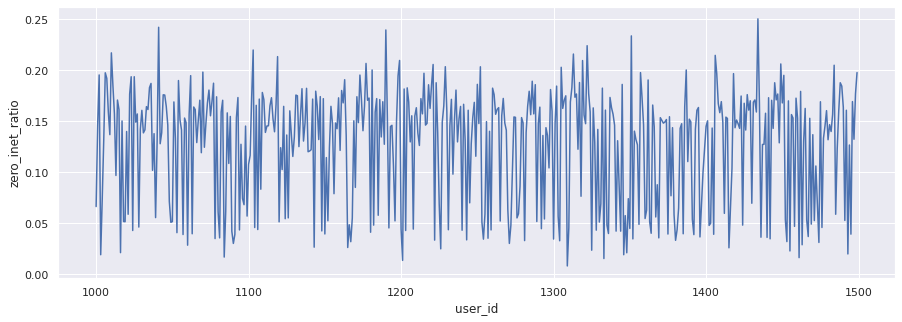

In [40]:
plt.figure(figsize=(15, 5))
plt.plot(zero_inet_pivot['zero_inet_ratio'])
plt.xlabel('user_id')
plt.ylabel('zero_inet_ratio')
plt.show()

Предполагаем, что источниками записей с нулевым объемом интернет-сессий являются: попытки синхронизации сервисов и приложений, прерванный пользователем переход по ссылкам, разрыв соединения при неустойчивом приеме и т.п.

Однако, следует проверить нет ли взаимосвязи у абонентов между количеством звонков длительностью 0 минут и количеством интренет-сессий нулевого объема.

Сформируем сводную таблицу с информацией о звонках и интернет-сессиях абонентов, имеющих и звонки длительностью 0 минут и сессии объемом 0Мб. Определим число таких абонентов и коэфиициент корреляции появления нулевых значений двух показателей.

In [41]:
zero_calls_inet = pd.merge(zero_calls_pivot, zero_inet_pivot, how='inner', on=['user_id'])

In [42]:
print('Количество абонентов в таблице: {} ({:.1%} - {:.1%})'.\
      format(zero_calls_inet.shape[0],zero_calls_inet.shape[0]/zero_inet_pivot.shape[0],zero_calls_inet.shape[0]/zero_calls_pivot.shape[0]))

Количество абонентов в таблице: 488 (98.8% - 99.2%)


In [43]:
print('Коэффициент корреляции звонков длительностью 0 минут объема интернета 0Мб: {:.5f}'.\
      format(zero_calls_inet.zero_inet_count.corr(zero_calls_inet.zero_calls_count)))

Коэффициент корреляции звонков длительностью 0 минут объема интернета 0Мб: 0.33657


Идентификаторы абонентов имеющих как звонки нулевой продолжительности, так и интернет-сессии нулевого объема пересекаются на 99%. Однако низкий коэффициент корреляции количества "нулевых звонков" и "пустых сессий" у абонентов не позволяет сделать вывод об их единой природе.

Считаем, что записи об интернет-сессиях нулевого объема, хотя и представляющие ценность для исследования качества обслуживания, не представляют интереса для анализа тарифов "Мегалайна". Данные записи могут быть удалены из таблицы без ущерба для качества выводов.

In [44]:
internet_wo_zero = pd.DataFrame(internet.query('mb_used!=0'))

In [45]:
internet_wo_zero['mb_used'].describe().apply(lambda x: format(x, '.2f'))

count    129798.00
mean        426.58
std         255.60
min           1.00
25%         228.00
50%         401.00
75%         593.00
max        1725.00
Name: mb_used, dtype: object

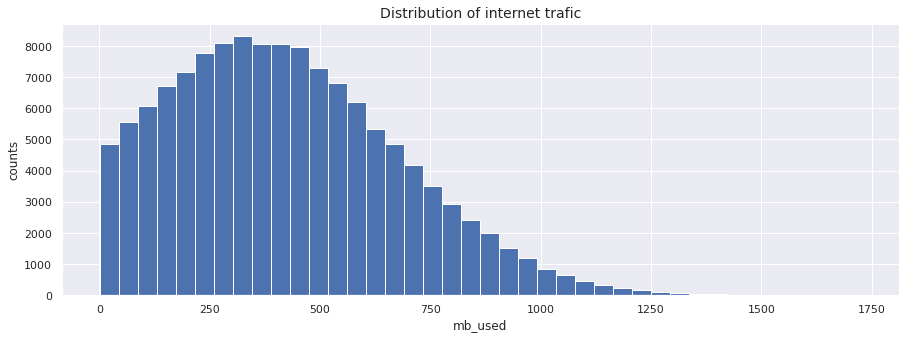

In [46]:
plt.figure(figsize=(15, 5))
plt.hist(internet_wo_zero.mb_used,bins=40)
plt.title('Distribution of internet trafic',fontsize=14)
plt.xlabel('mb_used')
plt.ylabel('counts')
plt.grid(True)
plt.show();

По очищенным от нулеых значений данным об объемах интернет-сессий получаем распределение со смещением вправо с (по форме - распределение Пуассона) типичным (средним) трафиком в 426,58Мб и стандартным отклонением 255,6Мб.

Добавим в таблицу с очищенными данными об объеме интернет-трафика, столбец содержащий информацию о месяце интернет-сессии.

In [47]:
internet_wo_zero['month'] = pd.DatetimeIndex(internet_wo_zero['session_date']).month
internet_wo_zero['month'] = internet_wo_zero['month'].apply(lambda x: calendar.month_abbr[x])

Добавим в **результирующую таблицу** информацию об объеме потребленного пользователями интернет трафика по месяцам.

In [48]:
result_table=result_table.join(internet_wo_zero.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum').fillna(0),how='outer',lsuffix='_min',rsuffix='_mb')

In [49]:
result_table.head()

(count, duration)  (sum, duration)  mb_used
user_id month                                             
1000    Aug                 42.0            408.0  14070.0
        Dec                 38.0            333.0   9827.0
        Jul                 41.0            340.0  14016.0
        Jun                 28.0            172.0  23257.0
        May                 17.0            159.0   2256.0

**Исследование таблицы "Информация о сообщениях".**

---



Дублей в таблице "Информация о сообщениях" нет.

In [50]:
messages.duplicated().sum()

0

Для получения информации об СМС абонентов сформируем сводную таблицу и определим количество сообщений, приходящихся на каждого пользователя.

In [51]:
messages_pivot=pd.pivot_table(messages,index='user_id', values='id', aggfunc='count')
messages_pivot['id'].describe().apply(lambda x: format(x, '.1f'))

count     426.0
mean      288.8
std       267.6
min         1.0
25%        85.8
50%       215.5
75%       414.0
max      1463.0
Name: id, dtype: object

В среднем абоненты "Мегалайна" из представленной выборки отправляют 2 сообщения за три дня, но есть и пользователи, не использующие сервис коротких сообщений (таких 74 человека) или редко использующие. Четверть абонентов отправляют СМС в среднем не чаще одного раза за 5 дней. 

Зафиксированный максимум - в среднем 4 сообщения в день, очевидно, не является ошибкой, судя по форме графика количества СМС.

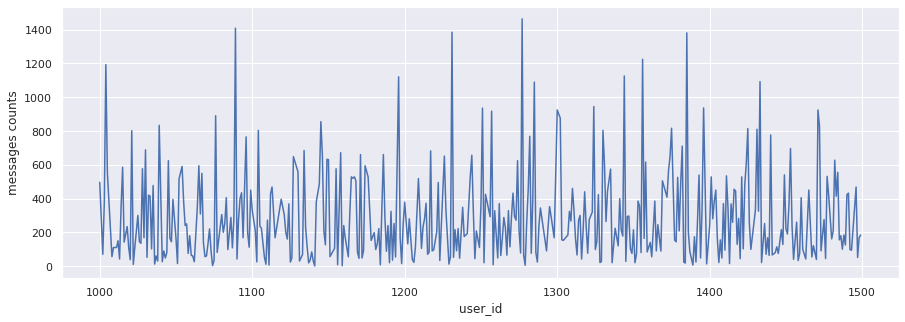

In [52]:
plt.figure(figsize=(15, 5))
plt.plot(messages_pivot.id)
plt.xlabel('user_id')
plt.ylabel('messages counts')
plt.show();

Добавим в таблицу с данными о сообщениях пользователей, столбец содержащий информацию о месяце отправки СМС.

In [53]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages['month'] = messages['month'].apply(lambda x: calendar.month_abbr[x])

Рассчитаем для каждого пользователя отправленных сообщений по месяцам и добавим в **результирующую таблицу**:

In [54]:
result_table=result_table.join(messages.pivot_table(index=['user_id','month'],values='id',aggfunc='count').fillna(0),how='outer',lsuffix='_min',rsuffix='_mb')

In [55]:
result_table.columns=['calls_count','calls_duration','mb_used','messages_count']
result_table['ext_rev_calls']=0
result_table['ext_rev_mb']=0
result_table['ext_rev_msgs']=0
result_table['revenue']=0
result_table.head()

calls_count  calls_duration  ...  ext_rev_msgs  revenue
user_id month                               ...                       
1000    Aug           42.0           408.0  ...             0        0
        Dec           38.0           333.0  ...             0        0
        Jul           41.0           340.0  ...             0        0
        Jun           28.0           172.0  ...             0        0
        May           17.0           159.0  ...             0        0

[5 rows x 8 columns]

**Исследование таблицы "Информация о тарифах".**

---



Информация о тарифах заполена в соотвествии с описанием данных.

In [56]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Исследование таблицы "Информация о пользователях".**

---



Таблица "Информация о пользователях" содержит 500 уникальных записей.

In [57]:
users.duplicated().sum()

0

Проверим, нет ли среди абонентов, прекративших пользование тарифом, клиентов, переключившихся на другой тариф оператора. Для этого сравним полные имена  абонентов, разорвавших контракт, с полными именами оставшихся клиентов.

In [58]:
losted_users = users[users.churn_date.isna()==False]
losted_users['full_name']=losted_users.first_name+" "+losted_users.last_name
users_full_name=users[users.churn_date.isna()].first_name+" "+users[users.churn_date.isna()==False].last_name
losted_users.full_name.isin(users_full_name).sum()

0

Рассчитаем в результирующей таблице **ежемесячную выручку** с каждого пользователя:

---



In [59]:
#Условия тарифов
smart_terms={
    'rub_monthly_fee':tariffs[tariffs['tariff_name']=='smart']['rub_monthly_fee'].values[0],
    'minutes_included':tariffs[tariffs['tariff_name']=='smart']['minutes_included'].values[0],
    'mb_per_month_included':tariffs[tariffs['tariff_name']=='smart']['mb_per_month_included'].values[0],
    'messages_included':tariffs[tariffs['tariff_name']=='smart']['messages_included'].values[0],
    'rub_per_minute':tariffs[tariffs['tariff_name']=='smart']['rub_per_minute'].values[0],
    'rub_per_gb':tariffs[tariffs['tariff_name']=='smart']['rub_per_gb'].values[0],
    'rub_per_message':tariffs[tariffs['tariff_name']=='smart']['rub_per_message'].values[0]
}
ultra_terms={
    'rub_monthly_fee':tariffs[tariffs['tariff_name']=='ultra']['rub_monthly_fee'].values[0],
    'minutes_included':tariffs[tariffs['tariff_name']=='ultra']['minutes_included'].values[0],
    'mb_per_month_included':tariffs[tariffs['tariff_name']=='ultra']['mb_per_month_included'].values[0],
    'messages_included':tariffs[tariffs['tariff_name']=='ultra']['messages_included'].values[0],
    'rub_per_minute':tariffs[tariffs['tariff_name']=='ultra']['rub_per_minute'].values[0],
    'rub_per_gb':tariffs[tariffs['tariff_name']=='ultra']['rub_per_gb'].values[0],
    'rub_per_message':tariffs[tariffs['tariff_name']=='ultra']['rub_per_message'].values[0]
}

In [60]:
#Рассчет выручки и превышения ресурсов по пакетам
def set_rev(ind):
    tar=users.loc[users['user_id']==ind[0],'tariff'].values[0]    
    if tar=='smart':
        terms=smart_terms
    else:
        terms=ultra_terms
    result_table.loc[ind,'ext_rev_calls']=result_table.loc[ind,'calls_duration']-terms['minutes_included'] if result_table.loc[ind,'calls_duration']>terms['minutes_included'] else 0
    result_table.loc[ind,'ext_rev_mb']=result_table.loc[ind,'mb_used']-terms['mb_per_month_included'] if result_table.loc[ind,'mb_used']>terms['mb_per_month_included'] else 0
    result_table.loc[ind,'ext_rev_msgs']=result_table.loc[ind,'messages_count']-terms['messages_included'] if result_table.loc[ind,'messages_count']>terms['messages_included'] else 0
    result_table.loc[ind,'revenue']=terms['rub_monthly_fee']+\
            result_table.loc[ind,'ext_rev_calls']*terms['rub_per_minute']+\
            np.ceil(result_table.loc[ind,'ext_rev_mb']/1024)*terms['rub_per_gb']+\
            result_table.loc[ind,'ext_rev_msgs']*terms['rub_per_message']  
    
result_table.apply(lambda x: set_rev(x.name),axis=1);

In [61]:
result_table.head(20)

calls_count  calls_duration  ...  ext_rev_msgs  revenue
user_id month                               ...                       
1000    Aug           42.0           408.0  ...           0.0   1950.0
        Dec           38.0           333.0  ...           0.0   1950.0
        Jul           41.0           340.0  ...           0.0   1950.0
        Jun           28.0           172.0  ...           0.0   1950.0
        May           17.0           159.0  ...           0.0   1950.0
        Nov           37.0           338.0  ...           0.0   1950.0
        Oct           44.0           350.0  ...           0.0   1950.0
        Sep           46.0           466.0  ...           0.0   1950.0
1001    Dec           47.0           414.0  ...           0.0    550.0
        Nov           45.0           430.0  ...           0.0   1350.0
1002    Aug           37.0           289.0  ...           0.0   1550.0
        Dec           27.0           236.0  ...           0.0   1150.0
        Jul           21.0           214.0  ...           0.0   1150.0
        Jun           14.0           117.0  ...           0.0    550.0
        Nov           25.0           243.0  ...           0.0   1350.0
        Oct           24.0           212.0  ...           0.0    550.0
        Sep           25.0           206.0  ...           0.0    950.0
1003    Aug           43.0           380.0  ...           0.0   1950.0
        Dec           88.0           802.0  ...           0.0   1950.0
        Nov           95.0           824.0  ...           0.0   1950.0

[20 rows x 8 columns]



---



---



---


## **Исследовательский анализ данных (EDA)**<a  class="anchor" id="EDA"></a>



#### **Сводная информация о поведении пользователей** 

Подвыборки абонентов с тарифом "Смарт" и с тарифом "Ультра".

In [62]:
smart_users=users.query('tariff=="smart"')['user_id']
ultra_users=users.query('tariff=="ultra"')['user_id']

Определим соотношение в выборке абонентов с тарифом "Смарт" и с тарифом "Ультра". 

In [63]:
print('Количество абонентов с тарифом "Смарт" в выборке - {}, с тарифом "Ультра" - {}'.format(smart_users.shape[0],ultra_users.shape[0]))

Количество абонентов с тарифом "Смарт" в выборке - 351, с тарифом "Ультра" - 149


Определим суммартную выручку от абонентов с тарифами "Смарт" и "Ультра".

In [64]:
smart_revenue=sum(result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),]['revenue'])
ultra_revenue=sum(result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),]['revenue'])

In [65]:
print('Суммарная выручка по выборке по тарифу "Смарт" - {:.2f}руб., по тарифу "Ультра" - {:.2f}руб.'.format(smart_revenue,ultra_revenue))

Суммарная выручка по выборке по тарифу "Смарт" - 2885751.00руб., по тарифу "Ультра" - 2040000.00руб.


Выручка от пользователей тарифа "Смарт" лишь на 41,5% превышает выручку в 2,3 раза менее многочисленной группы абонентов с тарифом "Ультра".   

Рассмотрим выручку компании по месяцам в разрезе тарифов.

In [66]:
revenue_from_smart=result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),].droplevel('user_id',axis=0)
revenue_by_month=revenue_from_smart.pivot_table(index=revenue_from_smart.index,values='revenue',aggfunc='sum')
revenue_from_ultra=result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),].droplevel('user_id',axis=0)
revenue_by_month=revenue_by_month.join(revenue_from_ultra.pivot_table(index=revenue_from_ultra.index,values='revenue',aggfunc='sum'),how='outer',rsuffix='_ultra')
revenue_by_month.columns=['Smart_revenue','Ultra_revenue']

In [67]:
for i in revenue_by_month.index:
    revenue_by_month.loc[i,'month_num']=list(calendar.month_abbr).index(i)
revenue_by_month.sort_values(by='month_num',inplace=True)

Визуально, выручка компании по месяцам возрастает линейно как совокупно, так и по тарифам отдельно.

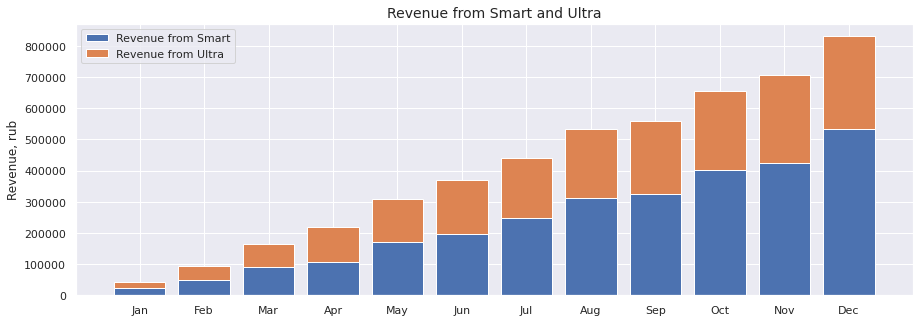

In [68]:
fig, ax = plt.subplots(figsize=(15, 5))

p1=ax.bar(np.arange(1,13),revenue_by_month['Smart_revenue'], label='Revenue from Smart')
p2=ax.bar(np.arange(1,13),revenue_by_month['Ultra_revenue'],bottom=revenue_by_month['Smart_revenue'].values, label='Revenue from Ultra')

ax.set_ylabel('Revenue, rub')
ax.set_title('Revenue from Smart and Ultra',fontsize=14)
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(revenue_by_month.index)

ax.legend()

plt.show()

Выберем пользователей двух тарифов, расходы которых превышают абонентскую плату.

In [69]:
overpayers_smart=result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),].query('revenue > 550')
overpayers_ultra=result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),].query('revenue > 1950')

In [70]:
print('Количество переплачивающих абонентов с тарифом "Смарт" в выборке - {} ({:.1%}), с тарифом "Ультра" - {} ({:.1%})'.\
      format(len(overpayers_smart.index.get_level_values('user_id').unique()),len(overpayers_smart.index.get_level_values('user_id').unique())/users.query('tariff=="smart"').shape[0],\
             len(overpayers_ultra.index.get_level_values('user_id').unique()),len(overpayers_ultra.index.get_level_values('user_id').unique())/users.query('tariff=="ultra"').shape[0]))

Количество переплачивающих абонентов с тарифом "Смарт" в выборке - 333 (94.9%), с тарифом "Ультра" - 43 (28.9%)


Почти **95%** абонентов с тарифом "Смарт" перерасходуют включенные количества минут разговора, сообщений и объемы интернет-трафика. В то время как в тариф "Ультра" не "укладываются" около трети его пользователей.


---


Сформируем таблицу, содержащую средние и медианные значения использования пользователями минут, мегабайтов и сообщений для каждого из двух тарифов.

In [71]:
columns=['calls_duration','mb_used','messages_count','revenue']
tariffs_means = pd.DataFrame(columns=columns)
#tariffs_means['tariff']=pd.Series(['ultra_mean','ultra_median','smart_mean','smart_median'])
tariffs_means[['calls_duration','mb_used','messages_count','revenue']]=tariffs_means[['calls_duration','mb_used','messages_count','revenue']].astype('float64')

In [72]:
for i in tariffs.tariff_name:
    tariff_users= smart_users if i=='smart' else ultra_users
    #средние значения
    tariffs_means.loc[i+'_median','calls_duration']=round(result_table.loc[(result_table.index.get_level_values('user_id').isin(tariff_users),),]['calls_duration'].median())
    tariffs_means.loc[i+'_median','mb_used']=round(result_table.loc[(result_table.index.get_level_values('user_id').isin(tariff_users),),]['mb_used'].median())
    tariffs_means.loc[i+'_median','messages_count']=round(result_table.loc[(result_table.index.get_level_values('user_id').isin(tariff_users),),]['messages_count'].median())
    tariffs_means.loc[i+'_median','revenue']=round(result_table.loc[(result_table.index.get_level_values('user_id').isin(tariff_users),),]['revenue'].median(),2)
    # медианные значения
    tariffs_means.loc[i+'_mean','calls_duration']=round(result_table.loc[(result_table.index.get_level_values('user_id').isin(tariff_users),),]['calls_duration'].mean())
    tariffs_means.loc[i+'_mean','mb_used']=round(result_table.loc[(result_table.index.get_level_values('user_id').isin(tariff_users),),]['mb_used'].mean())
    tariffs_means.loc[i+'_mean','messages_count']=round(result_table.loc[(result_table.index.get_level_values('user_id').isin(tariff_users),),]['messages_count'].mean())
    tariffs_means.loc[i+'_mean','revenue']=round(result_table.loc[(result_table.index.get_level_values('user_id').isin(tariff_users),),]['revenue'].mean(),2)
    # значения по условиям тарифа
    tariffs_means.loc[i+'_pure','calls_duration']=tariffs.query('tariff_name==@i')['minutes_included'].values[0]
    tariffs_means.loc[i+'_pure','mb_used']=tariffs.query('tariff_name==@i')['mb_per_month_included'].values[0]
    tariffs_means.loc[i+'_pure','messages_count']=tariffs.query('tariff_name==@i')['messages_included'].values[0]
    tariffs_means.loc[i+'_pure','revenue']=tariffs.query('tariff_name==@i')['rub_monthly_fee'].values[0]

In [73]:
inx=['smart_pure','smart_mean','smart_median','ultra_pure','ultra_mean','ultra_median']
tariffs_means.reindex(inx)

,calls_duration,mb_used,messages_count,revenue
smart_pure,500.0,15360.0,50.0,550.00
smart_mean,419.0,16244.0,39.0,1294.64
smart_median,423.0,16533.0,34.0,1038.00
ultra_pure,3000.0,30720.0,1000.0,1950.00
ultra_mean,548.0,19707.0,61.0,2071.07
ultra_median,529.0,19428.0,51.0,1950.00


В среднем, пользователи тарифа "Смарт" используют пакет минут, входящих в тариф, на 83,8 %, с то время как на тарифе "Ультра" средний абонент тратит лишь 18.27% включенных минут. Соотношение *выделенных* минут тарифа "Смарт" к тарифу "Ультра" 16,7%, а *использованных* в среднем минут 76,5%. Что позволяет сделать вывод о, в принципе, не выраженной потребности пользователей тарифа "Ультра" в большем количестве минут, включенных в стартовый пакет, по сравнению с тарифом "Смарт"

Пользователи "Смарта", в среднем, используют 78% СМС, входящих в пакет, а абоненты с тарифом "Ультра" всего 6.1%. Эти данные укладываются в общий тренд перехода к обмену сообщениями через мессенждеры и сведения роли сервиса коротких сообщенй к технической функции (передача информации, позволяющая с разумной долей уверенности определить отправителя, и которая случайным образом не станет общедоступна).

Средний абонент тарифа "Смарт" перерасходует объем входящего в абонплату трафика на 5,8%, на тарифе "Ультра" выделенный интернет-трафик в среднем используется на 64.1%. В то же время дополнительные пакеты трафика являются основным источником выручки сверх абонентской платы для обоих тарифов.



---



Рассмотрим структуру расходов пользователей тарифа "Смарт", которые используют ресурсы сверх пакетов.

In [74]:
overpayers_smart_expenses=pd.DataFrame(columns=['source','amount'])
overpayers_smart_expenses.loc[0,'source']='extra_minutes'
overpayers_smart_expenses.loc[0,'amount']=sum(overpayers_smart['ext_rev_calls'])*3
overpayers_smart_expenses.loc[1,'source']='extra_mb'
overpayers_smart_expenses.loc[1,'amount']=sum(np.ceil(overpayers_smart['ext_rev_mb']/1024))*200
overpayers_smart_expenses.loc[2,'source']='extra_messages'
overpayers_smart_expenses.loc[2,'amount']=sum(overpayers_smart['ext_rev_msgs'])*3
overpayers_smart_expenses.loc[3,'source']='fee'
overpayers_smart_expenses.loc[3,'amount']=sum(overpayers_smart['revenue'])-sum(overpayers_smart['ext_rev_calls'])*3-sum(np.ceil(overpayers_smart['ext_rev_calls']/1024))*200-sum(overpayers_smart['ext_rev_msgs'])*3

Состав выручки от абонентов с тарифом "Смарт", которые используют ресурсы сверх пакетов:

In [75]:
overpayers_smart_expenses.style.format({'amount':'{:.0f} руб.'}).set_properties(subset=['source'], **{'width': '200px'})

,source,amount
0,extra_minutes,278217 руб.
1,extra_mb,1342800 руб.
2,extra_messages,38784 руб.
3,fee,2107750 руб.


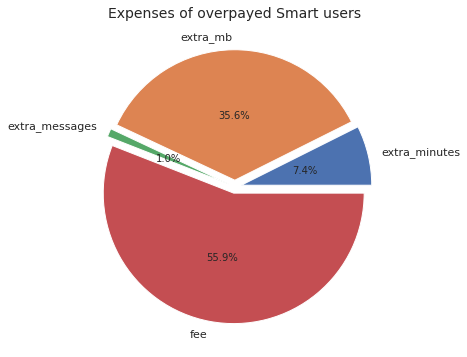

In [76]:
pie, ax = plt.subplots(figsize=[10,6])
labels = overpayers_smart_expenses['source']
plt.pie(x=overpayers_smart_expenses['amount'], autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title('Expenses of overpayed Smart users', fontsize=14);


Наглядно видно, что основную нехватку ресурсов, доступных в рамках абонплаты, пользователи тарифа "Смарт" испытывают в сегменте интернет-трафика.

In [77]:
overpayers_ultra_expenses=pd.DataFrame(columns=['source','amount'])
overpayers_ultra_expenses.loc[0,'source']='extra_minutes'
overpayers_ultra_expenses.loc[0,'amount']=sum(overpayers_ultra['ext_rev_calls'])*3
overpayers_ultra_expenses.loc[1,'source']='extra_mb'
overpayers_ultra_expenses.loc[1,'amount']=sum(np.ceil(overpayers_ultra['ext_rev_mb']/1024))*200
overpayers_ultra_expenses.loc[2,'source']='extra_messages'
overpayers_ultra_expenses.loc[2,'amount']=sum(overpayers_ultra['ext_rev_msgs'])*3
overpayers_ultra_expenses.loc[3,'source']='fee'
overpayers_ultra_expenses.loc[3,'amount']=sum(overpayers_ultra['revenue'])-sum(overpayers_ultra['ext_rev_calls'])*3-sum(np.ceil(overpayers_ultra['ext_rev_calls']/1024))*200-sum(overpayers_ultra['ext_rev_msgs'])*3

Состав выручки от абонентов с тарифом "Ультра", которые используют ресурсы сверх пакетов:

In [78]:
overpayers_ultra_expenses.style.format({'amount':'{:.0f} руб.'}).set_properties(subset=['source'], **{'width': '200px'})

,source,amount
0,extra_minutes,0 руб.
1,extra_mb,159000 руб.
2,extra_messages,0 руб.
3,fee,380550 руб.


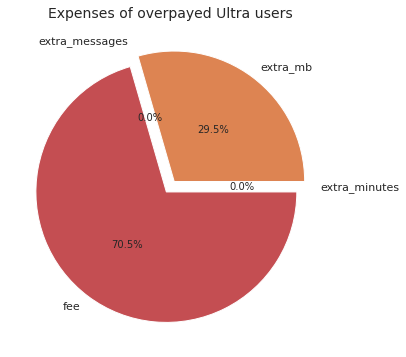

In [79]:
pie, ax = plt.subplots(figsize=[10,6])
labels = overpayers_ultra_expenses['source']
plt.pie(x=overpayers_ultra_expenses['amount'], autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title('Expenses of overpayed Ultra users', fontsize=14);


Для абонентов с тарифом "Ультра" единственным источником перерасхода средств, выделенных в рамках пакета, является интернет.



---



#### **Показатели описательной статистики для двух тарифов**

Форма гистограммы среднемесячного использования минут разговоров абонентов с тарифом "Смарт" позоляет предположить нормальное распределение этого показателя. 

In [80]:
smart_calls_var=np.var(result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),]['calls_duration'])
print('Среднее количество использованных минут на тарифе "Смарт" составляет: {:.0f} (дисперсия {:.2f} и стандартное отклонение {:.2f})'.\
      format(tariffs_means.loc['smart_mean','calls_duration'],smart_calls_var,np.sqrt(smart_calls_var)))

Среднее количество использованных минут на тарифе "Смарт" составляет: 419 (дисперсия 35702.05 и стандартное отклонение 188.95)


Расчет стандартного отклонения подтверждает распределение Гаусса для средних количества минут разговоров из выборки пользователей тарифа "Смарт": гистограмма показывает, что 95% значений находятся в интервале +/- 1,96 сигм (от 48 до 789мин.) от среднего значения.

Частотная гистограмма количества минут разговоров пользователей тарифа "Ультра" демонстрирует отклоненеие от нормального распределения этого показателя: график имеет смещение влево (значения меньше среднего лежат в интервале менее 2х стандартных отклонений, правая граница значений больше среднего расположена на 3х сигмах).

In [81]:
ultra_calls_var=np.var(result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),]['calls_duration'])
print('Среднее количество использованных минут на тарифе "Ультра" составляет: {:.0f} (дисперсия {:.2f} и стандартное отклонение {:.2f})'.\
      format(tariffs_means.loc['ultra_mean','calls_duration'],ultra_calls_var,np.sqrt(ultra_calls_var)))

Среднее количество использованных минут на тарифе "Ультра" составляет: 548 (дисперсия 93239.87 и стандартное отклонение 305.35)


Это укладывается в предположение о меньшей заинтересованности абонентов "Мегалайна" с тарифом "Ультра" в 3000м пакете минут разговора.

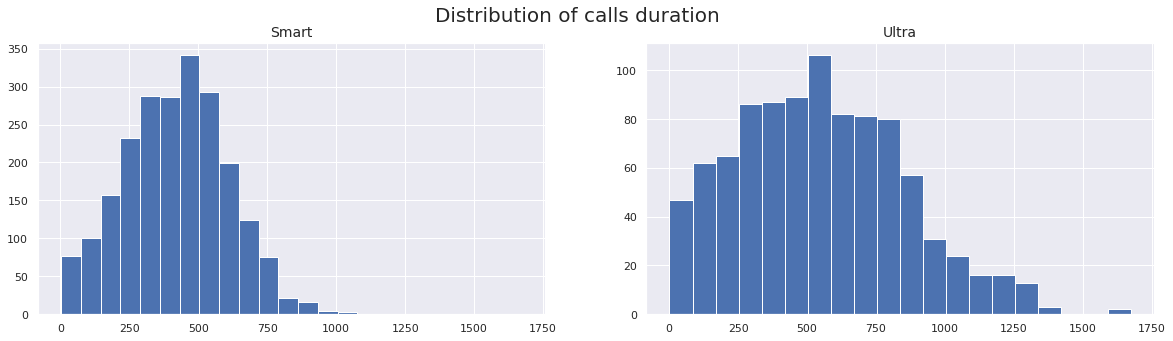

In [82]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))
axes[0].hist(result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),]['calls_duration'], bins=20)
axes[1].hist(result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),]['calls_duration'], bins=20)
axes[0].set_title('Smart', fontsize=14)
axes[1].set_title('Ultra', fontsize=14)
fig.suptitle('Distribution of calls duration',fontsize=20);



---



Средний объем использованного интернет-трафика абонентами "Мегалайна" с тарифом **"Смарт"** также распределен в соотвествии с фукцией Гаусса (нормальное распределение). Практически все значения укладываются в интервал "3х сигм", от 0 Мб до 33820 Мб.

In [83]:
smart_mb_var=np.var(result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),]['mb_used'])
smart_mb_mean=tariffs_means.loc['smart_mean','mb_used']
smart_mb_std=np.sqrt(smart_mb_var)
print('Среднее количество использованных мегабайтов на тарифе "Смарт" составляет: {:.0f} (дисперсия {:.2f} и стандартное отклонение {:.2f})'.\
      format(tariffs_means.loc['smart_mean','mb_used'],smart_mb_var,np.sqrt(smart_mb_var)))

Среднее количество использованных мегабайтов на тарифе "Смарт" составляет: 16244 (дисперсия 34324671.67 и стандартное отклонение 5858.73)


In [84]:
print('В интервале +/- 3std лежит {:.1%} значений.'.format(1-result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),].query('(mb_used<(@smart_mb_mean-3*@smart_mb_std))\
 or (mb_used>(@smart_mb_mean+3*@smart_mb_std))').shape[0]/result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),].shape[0]))

В интервале +/- 3std лежит 99.6% значений.


Распределение объема интеренета, потребляемого пользователями тарифа **"Ультра"** отклоняется от нормального с относительно более высокой сигмой.

In [85]:
ultra_mb_var=np.var(result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),]['mb_used'])
ultra_mb_mean=tariffs_means.loc['ultra_mean','mb_used']
ultra_mb_std=np.sqrt(ultra_mb_var)
print('Среднее количество использованных мегабайтов на тарифе "Ультра" составляет: {:.0f} (дисперсия {:.2f} и стандартное отклонение {:.2f})'.\
      format(ultra_mb_mean,ultra_mb_var,ultra_mb_std))

Среднее количество использованных мегабайтов на тарифе "Ультра" составляет: 19707 (дисперсия 98645116.49 и стандартное отклонение 9932.02)


In [86]:
print('В интервале +/- 2std лежит {:.1%} значений.'.format(1-result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),].query('(mb_used<(@ultra_mb_mean-2*@ultra_mb_std))\
 or (mb_used>(@ultra_mb_mean+2*@ultra_mb_std))').shape[0]/result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),].shape[0]))

В интервале +/- 2std лежит 97.1% значений.


97.1% значений находится в интервале +/- 2х стандартных отклонений от среднего (от 2680 Мб до 36313 Мб).

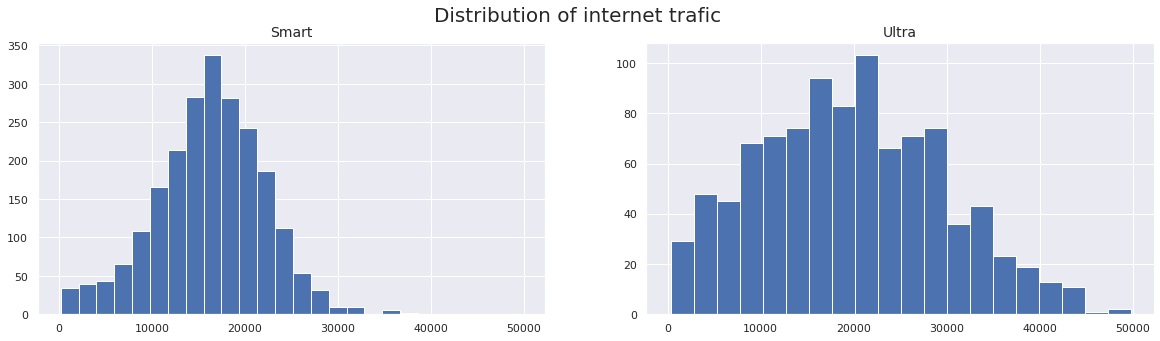

In [87]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))
axes[0].hist(result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),]['mb_used'], bins=20)
axes[1].hist(result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),]['mb_used'], bins=20)
axes[0].set_title('Smart', fontsize=14)
axes[1].set_title('Ultra', fontsize=14)
fig.suptitle('Distribution of internet trafic',fontsize=20);

Все вышеприведенное может указывать на разнородность потребностей пользователей тарифа "Ультра" в объеме интернет-трафика.



---



Частота встречаемости определенного числа сообщений, отправляемых в среднем в месяц пользователем тарифа "Смарт", падает с увеличением их количества. Визуально распределение совпадает с распределением Пуассона, для которого характерны большие относительные стандартные отклонения (в нашем случае стандартное отклонение составляет 68,7% от среднего значения).

In [88]:
smart_messages_var=np.var(result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),]['messages_count'])
print('Среднее количество отправленных сообщений на тарифе "Смарт" составляет: {:.0f} (дисперсия {:.2f} и стандартное отклонение {:.2f})'.\
      format(tariffs_means.loc['smart_mean','messages_count'],smart_messages_var,np.sqrt(smart_messages_var)))

Среднее количество отправленных сообщений на тарифе "Смарт" составляет: 39 (дисперсия 717.22 и стандартное отклонение 26.78)


Распределение среднемесячного количества СМС-сообщений абонентов с тарифом "Ультра" совпадает с таковым у пользователей тарифа "Смарт". Отклонения от среднего еще более выражены: сигма составляет 75.2% от среднего по выборке.

In [89]:
ultra_messages_var=np.var(result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),]['messages_count'])
print('Среднее количество отправленных сообщений на тарифе "Ультра" составляет: {:.0f} (дисперсия {:.2f} и стандартное отклонение {:.2f})'.\
      format(tariffs_means.loc['ultra_mean','messages_count'],ultra_messages_var,np.sqrt(ultra_messages_var)))

Среднее количество отправленных сообщений на тарифе "Ультра" составляет: 61 (дисперсия 2107.01 и стандартное отклонение 45.90)


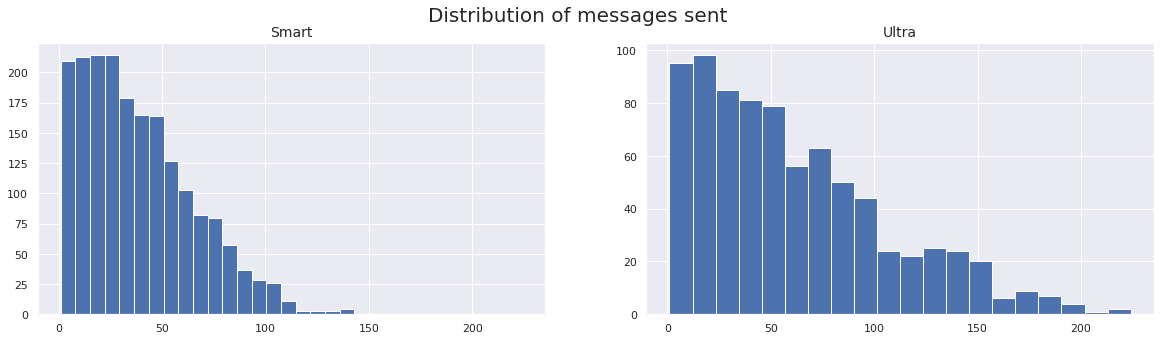

In [90]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))
axes[0].hist(result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),]['messages_count'], bins=20)
axes[1].hist(result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),]['messages_count'], bins=20)
axes[0].set_title('Smart', fontsize=14)
axes[1].set_title('Ultra', fontsize=14)
fig.suptitle('Distribution of messages sent',fontsize=20);



---



---


## **Формулировка и проверка статистических гипотез**<a  class="anchor" id="hypotheses"></a>

#### **Проверка гипотезы о различии выручки пользователей двух тарифов**

Для проверки того, отличается ли выручка от пользователей тарифов "Ультра" и "Смарт", применим двусторонний тест для нулевой гипотезы о том, что две независимые выборки имеют идентичные средние значения (Т-тест).
Его применимость обусловлена тем, что наши пользователи тарифов "Ультра" и "Смарт" в сущности, являются независимыми выборками двух генеральных совокупностей: "Все абонетны "Мегалайн" с тарифом "Смарт" и "Все абонетны "Мегалайн" с тарифом "Ультра".

Сформулируем **нулевую гипотезу**: *нет никаких отличий средней выручки от пользователей тарифов "Смарт" и "Ультра" (их средние выручки равны и дисперсии одинаковы)*.
Пороговый уровень значимости примем в 5% (alpha=0.05).

In [91]:
smarts_rev=result_table.loc[(result_table.index.get_level_values('user_id').isin(smart_users),),]['revenue']
ultra_rev=result_table.loc[(result_table.index.get_level_values('user_id').isin(ultra_users),),]['revenue']
results=st.ttest_ind(smarts_rev,ultra_rev,equal_var=True)

In [92]:
print('p-значение: ',results.pvalue)

p-значение:  2.9776448000521676e-158


Вероятность получить подобные или еще более выраженные отклонения средних из этих двух выборок при условии верности нулевой гипотезы очень мала.

**Вывод:** отвергаем нулевую гипотезу. Средняя выручка от абонентов "Мегалайна" с тарифом "Смарт" отличается от выручки пользователей тарифа "Ультра".



---



#### **Проверка гипотезы об отличии средней выручки москвичей**

Для проверки того, отличается ли от остальных выручка от пользователей из Москвы, применим двусторонний тест для нулевой гипотезы о том, что две независимые выборки имеют идентичные средние значения (Т-тест).
Его применимость обусловлена тем, что наши пользователи из Москвы и пользователи из других регионов, являются независимыми (параллельными) выборками одной генеральной совокупности: "Все абонетны "Мегалайн".

Сформулируем **нулевую гипотезу**: *нет никаких отличий средней выручки генерируемой пользователями из Москвы от выручки от пользователей из других регионов (их средние выручки равны и дисперсии одинаковы)*.
Пороговый уровень значимости примем в 5% (alpha=0.05).

In [93]:
moscow_res=users.query('city=="Москва"')['user_id'].values
rest_region_res=users.query('city!="Москва"')['user_id'].values

In [94]:
moscow_res_rev=result_table.loc[(result_table.index.get_level_values('user_id').isin(moscow_res),),]['revenue']
rest_region_res_rev=result_table.loc[(result_table.index.get_level_values('user_id').isin(rest_region_res),),]['revenue']
results=st.ttest_ind(moscow_res_rev,rest_region_res_rev,equal_var=True)

In [95]:
print('p-значение: ',results.pvalue)

p-значение:  0.531666503831252


Вероятность получить подобные или еще более выраженные отклонения средних из этих двух выборок при условии верности нулевой гипотезы превышает пороговое значение уровня значимости.

**Вывод:** не отвергаем нулевую гипотезу. Нельзя утверждать, что средняя выручка от абонентов "Мегалайна" из Москвы отличается от выручки от клиентов из остальных регионов.



---



---



## **Выводы и рекомендации**<a  class="anchor" id="summary"></a>

1) Тариф "Ультра" компании "Мегалайн" является более выгодным для вложения денег рекламного бюджета:
- он менее нагружен (декларируемые объемы улуг в рамках абонентской платы востребованы пользователями в среднем не более чем на 64.1%);
- вместе с тем тариф генерирует дополнительную выручку от отдельных пользователей в секторе дополнительных пакетов интернет-трафика.

Сотношение коэффициента численности абонентов "Смарт"/"Ультра" к коэффиценту выручки - 2,3 к 1,6. Каждый пользователь тарифа "Ультра" приносит компании на 66.5% больше выручки, чем абонент с тарифом "Смарт".

2) Условия тарифа "Смарт" не соотвествуют запросам более половины пользователей в части интернет-трафика, включенного в абонентскую плату.

3) Можно рекомендовать расширение тарифной линейки "Мегалайна" промежуточным тарифом, с расширением пакетов услуг исходя из их превышений по тарифу "Смарт". Например, с абонентской платой на уровне 1200 рублей, в которую будут включены:
- 1000 минут разговоров (планируемое среднее использование 50%); 
- 20Гб интернета (планируемое среднее использование 65%);
- 100 СМС (планируемое среднее использование 35%). 